# Linear Regression Example

## Programming Lab: 032_01 Gradient Descent Method

이번 실습에서는 기본적인 NumPy와 Matplotlib의 사용법을 익히고, Gradient Descent Method을 이용하여 predictor를 학습시켜 봅니다.

실습은 다음과 같은 단계로 이루어집니다.

<ul>
    <li> Step.1 Data Samples </li>    
    교재의 학습 데이터를 입력합니다.
    <li> Step.2 Gradient Descent Method (1) : Batch Gradient Descent</li>
    cost function에 대해 GDM을 이용하여 predictor를 학습시킵니다.
    <li> Step.2 Gradient Descent Method (2) : Stochastic Gradient Descent (SGD)</li>
    loss function에 대해 GDM을 이용하여 predictor를 학습시킵니다.
</ul>

먼저 다음 셀을 실행시켜 필요한 library들을 import하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

## Step.1 Input dataset

***
### Data Samples

linear regression model을 학습시키기 위한 dataset을 먼저 입력합니다. dataset은

(x, y) = (2, 81), (4, 93), (6, 91), (8, 97)

***
**Programming**

이번 실습에서는 교재에서 사용한 4개의 data sample들을 Numpy array로 입력합니다.

(Hint.1) np.array( )

Text(0, 0.5, 'y data')

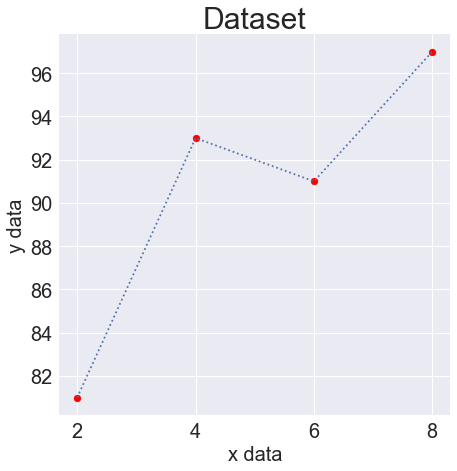

In [2]:
##### Start Your Code(Dataset Generation) #####
x_data = np.array([2, 4, 6, 8])
y_data = np.array([81, 93, 91, 97])
##### End Your Code(Dataset Generation) #####

# Target Function Visualization
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(x_data, y_data, linestyle = ':')

# Dataset Visualization
ax.scatter(x_data, y_data, color = 'r')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_title("Dataset", fontsize = 30)
ax.set_xlabel("x data", fontsize = 20)
ax.set_ylabel("y data", fontsize = 20)

**Expected Output**  
<img src="./imgs/3_00_01.png" width = 400>

## Step.2 Gradient Descent Method (1) : Batch Gradient Descent

위의 dataset에 따라 predictor는
$$ \hat{y} = w x+b$$
로 설정할 수 있습니다.

그리고 dataset에 대한 cost($\mathcal{J}$)는 
$$ \mathcal{J} = \frac{1}{2n} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)})^{2} = \frac{1}{2n} \sum_{i=1}^N  ((w x^{(i)}+b) - y^{(i)})^{2}$$
로 정의됩니다.

따라서 $w, b$에 대한 $\mathcal{J}$의 partial derivative는
$$ \frac{\partial \mathcal{J}}{\partial w} = \frac{1}{n} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)}) x^{(i)}$$
$$ \frac{\partial \mathcal{J}}{\partial b} = \frac{1}{n} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)})$$
입니다.

마지막으로 이를 이용한 Gradient descent method는

$$ w := w - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial w} = w - \alpha \frac{1}{n} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)}) x^{(i)}$$
$$ b := b - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial b} = b - \alpha \frac{1}{n} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)})$$
입니다.

***
**Programming**

초기 $w, b$는 각 0.0, 0.0 그리고 학습률(learning rate) $lr$은 0.03, 총 세대(epoch) $epochs$는 2001으로 설정하고 gradient descent method를 이용하여 optimal $w$와 $b$에 대한 approximation을 진행하세요.

(Hint.1) $w$의 변화와 loss를 추적하기 위하여 빈 리스트 w_list, loss_list를 각각 만들어줍니다.  
(Hint.2) 오차와 data sample 값의 곱에 대한 평균을 계산하여 w_diff 변수에 저장합니다.  
(Hint.3) 오차에 대한 평균을 계산하여 b_diff 변수에 저장합니다.  
(Hint.4) w와 b에 대한 gradient descent를 수행합니다.

epoch=0, w=13.9200, b=2.7150
epoch=500, w=3.4136, b=72.3542
epoch=1000, w=2.3973, b=78.4196
epoch=1500, w=2.3085, b=78.9493
epoch=2000, w=2.3007, b=78.9956


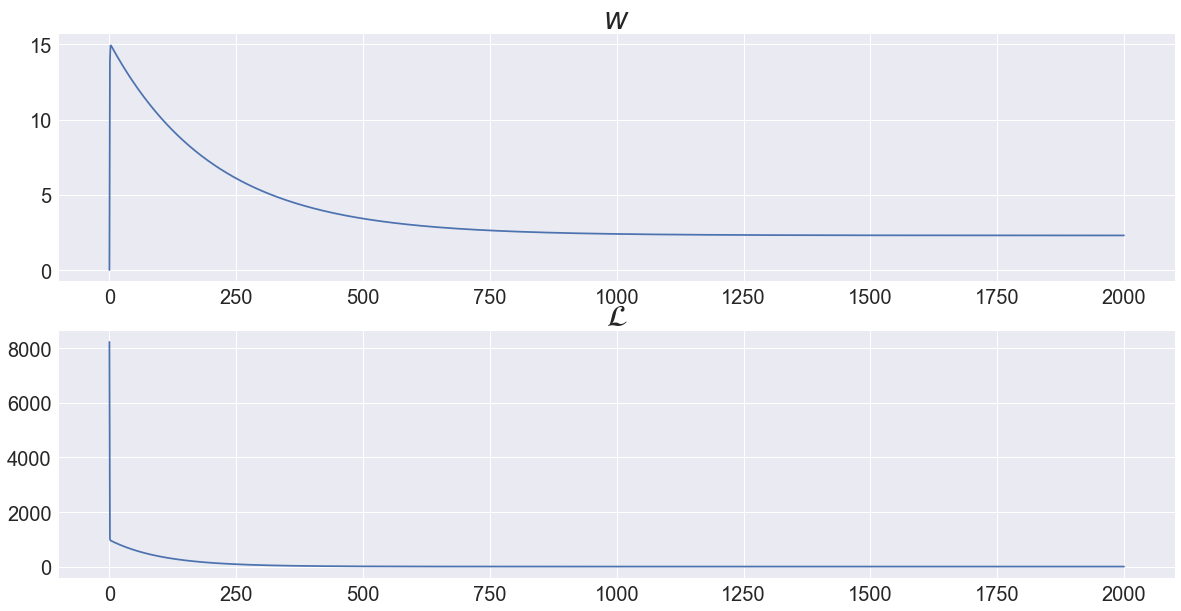

In [3]:
##### Start Your Code(Learning Preparation) #####
w = 0.0
b = 0.0
lr = 0.03
epochs = 2001
##### End Your Code(Learning Preparation) #####

w_list = []
loss_list = []

for epoch in range(epochs):
    ##### Start Your Code(Loss Calculation) #####
    pred = w * x_data + b
    loss = (pred - y_data) ** 2
    ##### End Your Code(Loss Calculation) #####

    w_list.append(w)
    loss_list.append(np.mean(loss))

    ##### Start Your Code(Gradient Calculation) #####
    w_diff = np.mean((pred - y_data)*x_data)
    b_diff = np.mean(pred - y_data)
    ##### End Your Code(Gradient Descent Method) #####

    
    ##### Start Your Code(Gradient Descent Method) #####
    w = w - lr*w_diff
    b = b - lr*b_diff
    ##### End Your Code(Gradient Descent Method) #####

    if epoch % 500 == 0:
        print("epoch=%d, w=%.04f, b=%.04f" % (epoch, w, b))

fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(w_list)
ax[1].plot(loss_list)
ax[0].set_title(r'$w$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

**Expected Output**  
epoch=0, w=13.9200, b=2.7150  
epoch=500, w=3.4136, b=72.3542  
epoch=1000, w=2.3973, b=78.4196  
epoch=1500, w=2.3085, b=78.9493  
epoch=2000, w=2.3007, b=78.9956  
<img src="./imgs/3_00_02.png">

이전 단계에서 구한 최적의 $w, b$를 사용하여 target function에 대한 그래프와 입력 데이터를 중첩하여 표시합니다.

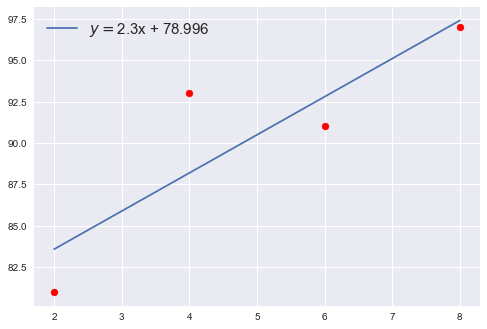

In [4]:
pred = w * x_data + b
plt.scatter(x_data, y_data, color = 'r')
plt.plot([min(x_data), max(x_data)], [min(pred), max(pred)], 
        label = r'$y = $' + str(round(w, 2)) + 'x + ' + str(round(b, 3)))
plt.legend(loc = 'upper left', fontsize = 15)
plt.show()

**Expected Output**  
<img src="./imgs/3_00_02_01.png">

### Step.3 Gradient Descent Method (2) : Stochastic Gradient Descent (SGD)

위의 dataset에 따라 predictor는
$$ \hat{y} = w x+b$$
로 설정할 수 있습니다.

그리고 i번째 data sample에 대한 loss($\mathcal{L}^{(i)}$)는 
$$ \mathcal{L}^{(i)} = (\hat{y}^{(i)} - y^{(i)})^{2} = ((w x^{(i)}+b) - y^{(i)})^{2}$$
로 정의됩니다.

따라서 $w, b$에 대한 $\mathcal{L}^{(i)}$의 partial derivative는
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial w} = 2x^{(i)}(\hat{y}^{(i)} - y^{(i)})$$
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial b} = \hat{y}^{(i)} - y^{(i)}$$
입니다.

마지막으로 이를 이용한 Gradient descent method는

$$ w := w - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial w} = w - 2\alpha x^{(i)}(\hat{y}^{(i)} - y^{(i)})$$
$$ b := b - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial b} = b - 2\alpha (\hat{y}^{(i)} - y^{(i)})$$
입니다.

***
**Programming**

초기 $w, b$는 각 0.0, 0.0 그리고 학습률(learning rate) $lr$은 0.01, 총 세대(epoch) $epochs$는 2001으로 설정하고 gradient descent method를 이용하여 optimal $w$와 $b$에 대한 approximation을 진행하세요.

(Hint.1) $w$의 변화와 loss를 추적하기 위하여 빈 리스트 w_list, loss_list를 각각 만들어줍니다.  
(Hint.2) 각 data sample에 대해 w에 대한 손실 함수의 편미분값을 w_diff 변수에 저장합니다.  
(Hint.3) 각 data sample에 대해 b에 대한 손실 함수의 편미분값을 b_diff 변수에 저장합니다.  
(Hint.4) w와 b에 대한 gradient descent를 수행합니다.

epoch=0, w=3.2400, b=1.6200
epoch=0, w=9.5136, b=3.1884
epoch=0, w=13.2012, b=3.8030
epoch=0, w=11.2152, b=3.5547
epoch=500, w=2.2094, b=78.7107
epoch=500, w=2.6455, b=78.8198
epoch=500, w=2.2024, b=78.7459
epoch=500, w=2.3040, b=78.7586
epoch=1000, w=2.2042, b=78.7465
epoch=1000, w=2.6392, b=78.8552
epoch=1000, w=2.1963, b=78.7814
epoch=1000, w=2.3000, b=78.7943
epoch=1500, w=2.2042, b=78.7465
epoch=1500, w=2.6392, b=78.8552
epoch=1500, w=2.1963, b=78.7814
epoch=1500, w=2.3000, b=78.7944
epoch=2000, w=2.2042, b=78.7465
epoch=2000, w=2.6392, b=78.8552
epoch=2000, w=2.1963, b=78.7814
epoch=2000, w=2.3000, b=78.7944


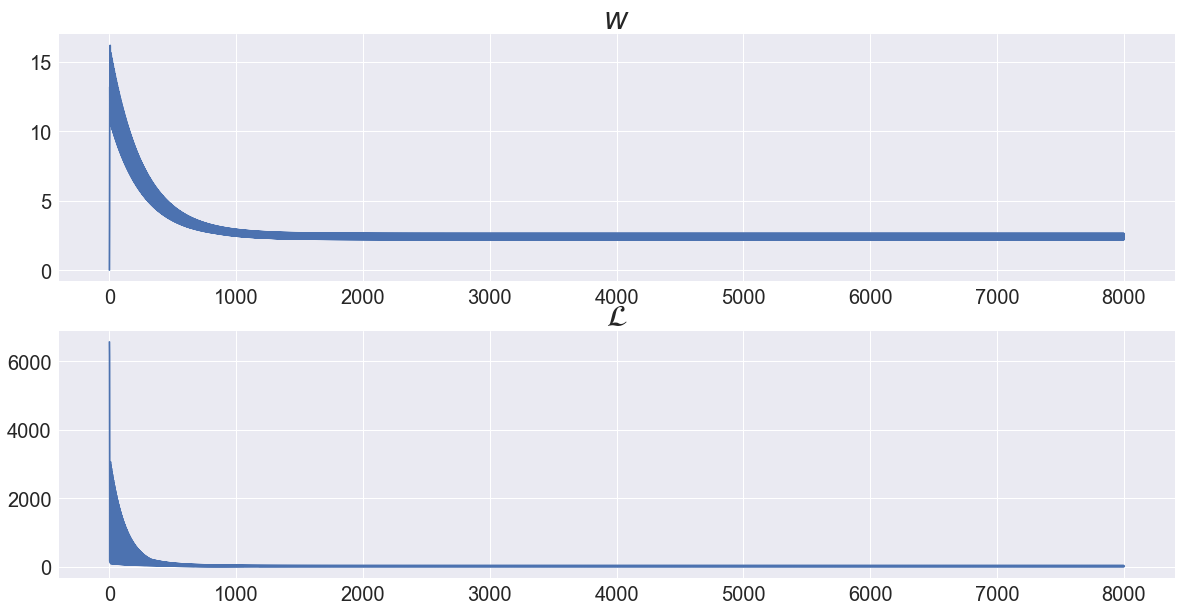

In [9]:
##### Start Your Code(Learning Preparation) #####
w = 0.0
b = 0.0
lr = 0.01
epochs = 2001
##### End Your Code(Learning Preparation) #####

w_list = []
loss_list = []

for epoch in range(epochs):
    for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
        ##### Start Your Code(Loss Calculation) #####
        pred = w * x + b
        loss = (pred - y) ** 2
        ##### End Your Code(Loss Calculation) #####

        w_list.append(w)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Calculation) #####
        w_diff = 2*x*(pred - y)
        b_diff = 2*(pred - y)
        ##### End Your Code(Gradient Descent Method) #####

        ##### Start Your Code(Gradient Descent Method) #####
        w = w - lr*w_diff
        b = b - lr*b_diff
        ##### End Your Code(Gradient Descent Method) #####

        if epoch % 500 == 0: # and data_idx == 0
            print("epoch=%d, w=%.04f, b=%.04f" % (epoch, w, b))
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(w_list)
ax[1].plot(loss_list)
ax[0].set_title(r'$w$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

**Expected Output**  
epoch=0, w=3.2400, b=1.6200  
epoch=500, w=2.2094, b=78.7107  
epoch=1000, w=2.2042, b=78.7465  
epoch=1500, w=2.2042, b=78.7465  
epoch=2000, w=2.2042, b=78.7465  
<img src="./imgs/3_00_03.png">

이전 단계에서 구한 최적의 $w, b$를 사용하여 target function에 대한 그래프와 입력 데이터를 중첩하여 표시합니다.

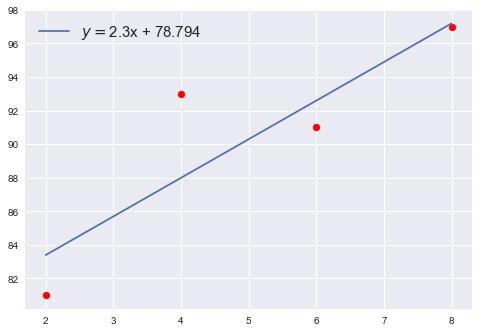

In [10]:
pred = w * x_data + b
plt.scatter(x_data, y_data, color = 'r')
plt.plot([min(x_data), max(x_data)], [min(pred), max(pred)], 
        label = r'$y = $' + str(round(w, 2)) + 'x + ' + str(round(b, 3)))
plt.legend(loc = 'upper left', fontsize = 15)
plt.show()

**Expected Output**  
<img src="./imgs/3_00_04.png">